# Regresión Lineal

### Laboratorio de Datos, IC - FCEN - UBA - 1er. Cuatrimestre 2024



### Preparando scikit-learn

Utilizaremos el módulo `scikit-learn` de Python. Para instalarlo, correr:

In [ ]:
pip install scikit-learn

Importamos los módulos de siempre, las herramientas de modelos lineales y las medidas de desempeño del modelo de `scikit-learn`:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

### Modelo de Regresión Lineal

Queremos utilizar un modelo lineal:
$$ Y = \beta_0 + \beta_1 X $$
para intentar predecir valores continuos.

### Visualización

Con lo que hemos visto las clases anteriores, visualizar la recta que mejor aproxima a los datos en el sentido de cuadrados mínimos es relativamente sencillo con `seaborn objects`, ya que `seaborn` calcula automáticamente los valores de $\beta_0$ y $\beta_1$.

Utilizaremos el dataset _tips_ de `seaborn` y analizaremos la relación entre lo que costó la comida y la cantidad de propina.

In [ ]:
datos = sns.load_dataset('tips')
datos

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Visualizamos los datos con `so.Plot` (repasar clase de visualización)

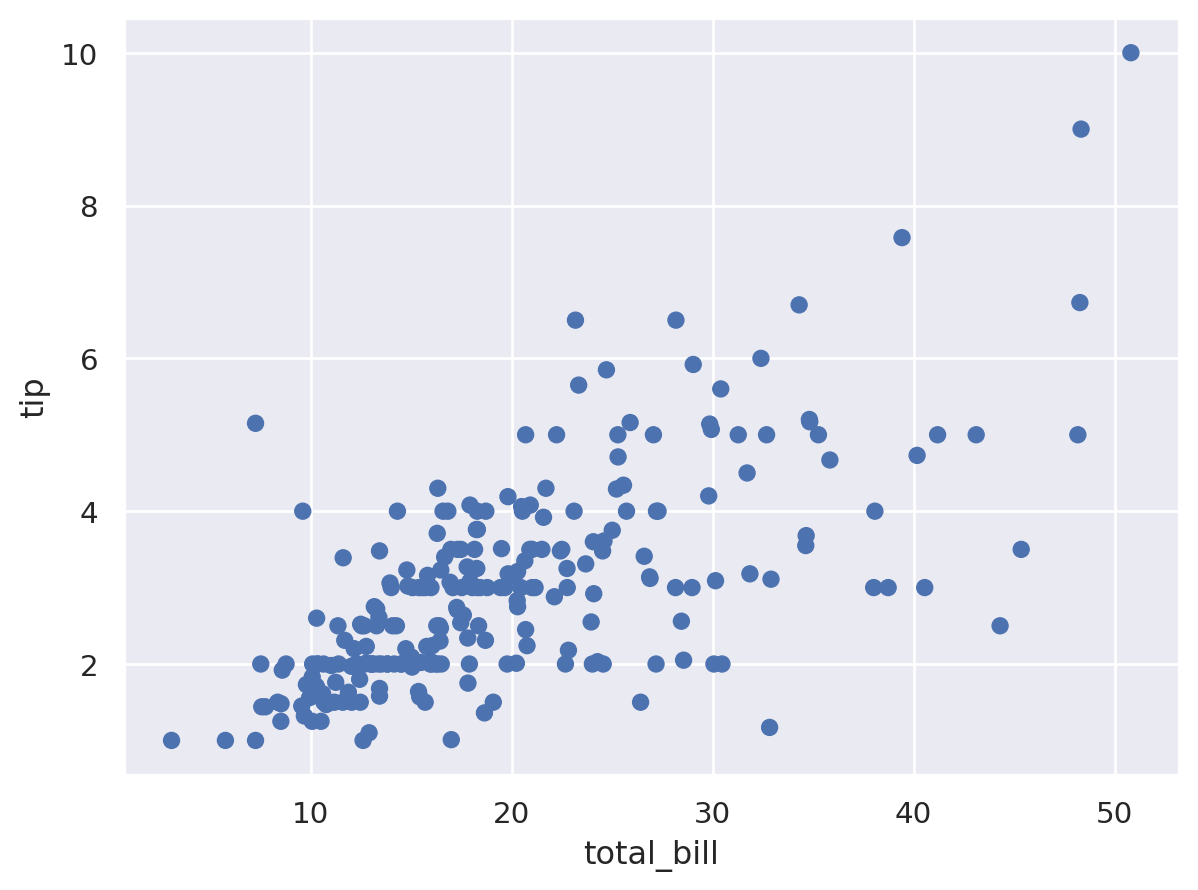

In [ ]:
# Graficamos la relacion entre las variables

(
    so.Plot(data=datos, x='total_bill', y='tip')
    .add(so.Dot())
)

Para visualizar la recta de la regresión, agregamos una línea al gráfico (`so.Line()`) junto a `so.PolyFit(1)`:

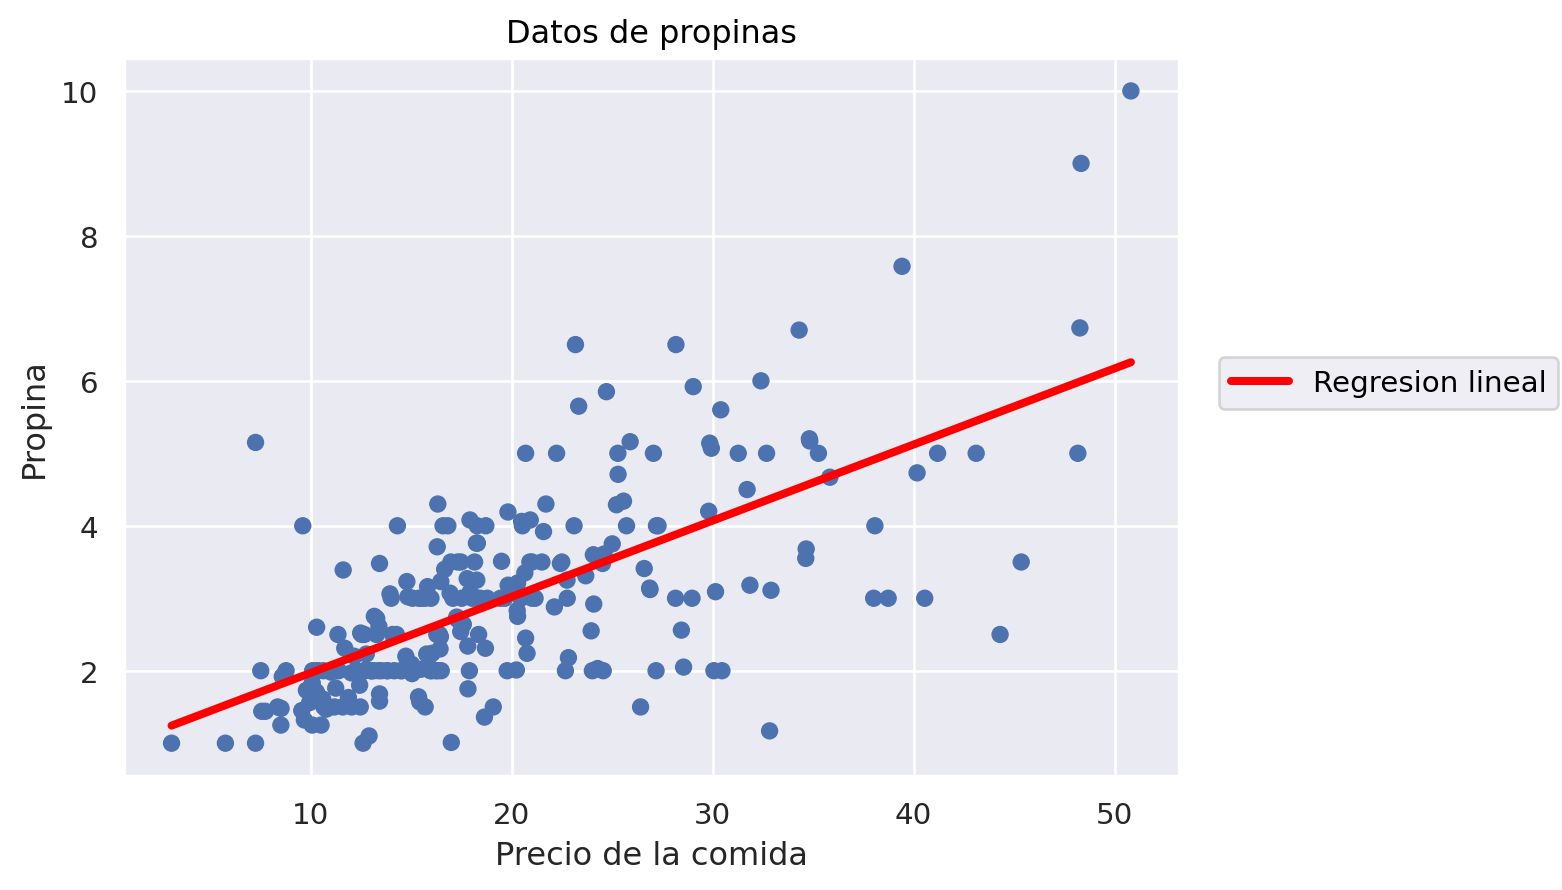

In [ ]:
(
    so.Plot(data=datos, x='total_bill', y='tip')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')    # Agregamos una etiqueta para la leyenda del grafico
    .label(title='Datos de propinas', x='Precio de la comida', y='Propina')    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)

### Cálculo de coeficientes y predicciones

Desafortunamente, `seaborn` no nos devuelve los valores de $\beta_0$ y $\beta_1$, que son importantes en la interpretación del resultado.

Hemos visto que podemos calcular los coeficientes de la regresión lineal como:

 $$
 \begin{array}{rl}
      \hat{\beta}_1 = & \dfrac{\displaystyle\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\displaystyle\sum_{i=1}^n(x_i - \bar{x})^2}  \\[1em]
      \hat{\beta}_0 = & \bar{y} - \hat{\beta}_1\bar{x}
 \end{array}
 $$

 pero también podemos utilizar `scikit-learn`:

In [ ]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo.fit(datos[['total_bill']], datos[['tip']])   # Realizamos el ajuste
beta_1 = modelo.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
beta_0 = modelo.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)

# Para obtener los valores de beta_1 y beta_0 como valores numericos
beta_1 = modelo.coef_[0][0]
beta_0 = modelo.intercept_[0]
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)

# O podemos usar .item()
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)


**MUY IMPORTANTE:** notar los corchetes extra de `datos[['metros_cuad']]` y `datos[['precio']]`. Los doble corchetes hacen que `datos[['precio']]` sea un pandas.Dataframe y no un pandas.Series.

<span style="color:red">**EL MÉTODO .fit() ADMITE DATAFRAMES (O MATRICES), NO ADMITE SERIES (NI ARRAYS). USAR DOBLE CORCHETE.**</span>

In [ ]:
display(datos['total_bill'])
type(datos['total_bill'])

In [ ]:
display(datos[['total_bill']])
type(datos[['total_bill']])

Entonces, la recta que mejor aproxima a los datos es (redondeando):
$$ Y = 0.92 + 0.105 X$$

Una interpretación que podemos darle a este resultado es que, por cada peso que costó la comida, se dejan de propina 0.105 pesos (o sea, alrededor de 10 centavos)

Con los valores de $\beta_0$ y $\beta_1$ podemos predecir cuanto será la propina según el valor de la comida. Supongamos que queremos predecir la propina que se deja por una cuenta \\$35. Utilizamos el método `predict()` del modelo.

<span style="color:red">**EL MÉTODO .predict() TAMBIEN SOLO ADMITE ADMITE DATAFRAMES (O MATRICES).**</span>

In [ ]:
modelo.predict(pd.DataFrame({'total_bill': [35]}))

array([[4.59612772]])

In [ ]:
# Para devolver directamente el numero agregamos .item()
modelo.predict(pd.DataFrame({'total_bill': [35]})).item()

4.596127722007041

También podemos hacer directamente la cuenta porque ya sabemos cuanto valen $\beta_1$ y $\beta_0$:

In [ ]:
beta_1 * 35 + beta_0

4.596127722007041

Según nuestro modelo, se deberían dejar aproximadamente \\$4.60 de propina. También podemos predecir la propina de una cuenta mayor a cualquiera que las que aparecen en los datos. Por ejemplo, una comida que costó \\$60:

In [ ]:
modelo.predict(pd.DataFrame({'total_bill': [60]}))

array([[7.22174066]])

Podemos predecir varios valores de una:

In [ ]:
modelo.predict(pd.DataFrame({'total_bill': [35, 60]}))

array([[4.59612772],
       [7.22174066]])

Para que nos devuelva un array de numpy en vez de una matriz, usamos el método `flatten()`:

In [ ]:
modelo.predict(pd.DataFrame({'total_bill': [35, 60]})).flatten()

Esto sirve, por ejemplo, si queremos calcular los valores predichos por el modelo $\hat{y}_i$ :

In [ ]:
y_pred = modelo.predict(datos[['total_bill']]).flatten()
display(y_pred)

O podemos calcular $\hat{y}$ usando los valores de $\beta_1$ y $\beta_0$

In [ ]:
y_pred = beta_1 * datos['total_bill'] + beta_0
display(y_pred)

Finalmente, el bueno de `scikit-learn` nos calcula el coeficiente de determinación $R^ 2$: primero van los datos observados ( $y$ ) y luego los datos predichos ( $\hat{y}$ )

In [ ]:
y_pred = modelo.predict(datos[['total_bill']])
r2_score(datos[['tip']], y_pred)

De manera análoga podemos calcular el error cuadrático medio (ECM):

In [ ]:
mean_squared_error(datos[['tip']], y_pred)

1.036019442011377

In [ ]:
np.sum(np.array([1,2,3]))

6

# Ejercicios

In [ ]:
pip install gapminder

In [ ]:
from gapminder import gapminder

In [ ]:
def coef_rl (x, y):
  x_prom = x.mean()
  y_prom = y.mean()
  beta_1 = np.sum((x - x_prom)*(y - y_prom)) / np.sum((x - x_prom)**2)
  beta_0 = y_prom - beta_1 * x_prom
  return beta_1, beta_0

In [2]:
datos = gapminder[(gapminder["country"] == "Argentina")]
display(datos.head())
print(coef_rl(datos["year"], datos["lifeExp"]))

NameError: name 'gapminder' is not defined

In [ ]:
modelo = linear_model.LinearRegression()
modelo.fit(datos[["year"]], datos[["lifeExp"]])
beta_1 = modelo.coef_.item()
beta_2 = modelo.intercept_.item()
print(beta_1,beta_2)

0.23170839160839155 -389.6063445221444


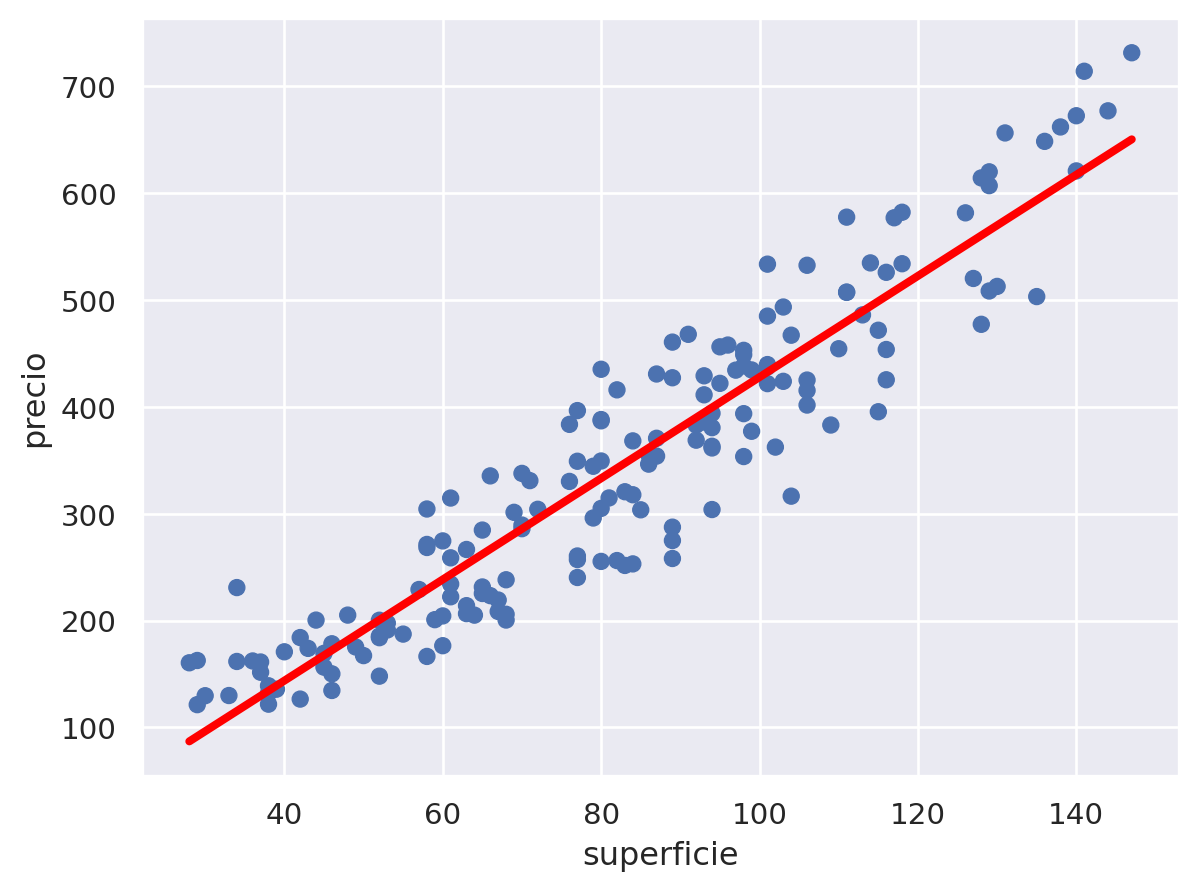

In [ ]:
datos = pd.read_csv("inmuebles.csv")
datos.head()
(
    so.Plot(data = datos, x = datos["superficie"], y = datos["precio"])
    .add(so.Dot())
    .add(so.Line(color = "Red", linewidth = 3), so.PolyFit(1), )
)